In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# find_closest_centroids #
Given all the points, and a set of centroids, for each point, compute which centroid is closest to it.

In [27]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X: (m, n)
        centroids: (K, n)

    Returns:
        idx: (m,) closest centroids

    """
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    # slow loop-based implementation
    # for i in range(X.shape[0]):
    #     cur = 0
    #     value = 1e9
    #     for c in range(K):
    #         dist = np.linalg.norm(X[i]-centroids[c])
    #         if(dist < value):
    #             value = dist
    #             cur = c
    #     idx[i] = cur

    # faster using np.newaxis
    distances_squared = np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2)
    # shape of X[: np.newaxis, :] is (m,1,n)
    # subtraction is broadcasted, so we have K*(m,1,n) - m*(K,n) -> (m,K,n)

    idx = np.argmin(distances_squared, axis=1)

    return idx

# compute_centroids #
For each point, we have a closest centroid. For each idx (centroid) from 1 to K, we have a set of points, for which we can compute new centroids by finding means of the points assigned to each previous centroid.

In [28]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X: (m, n) Data points
        idx: (m,) idx[i] contains the index of
             the centroid closest to example i
        K: number of centroids

    Returns:
        centroids: (K, n) New centroids computed
    """
    m, n = X.shape

    centroids = np.zeros((K, n))

    for c in range(K):
        mask = (idx == c)
        acc = np.sum(X[mask], axis=0)
        cnt = np.sum(mask)
        if cnt==0:
            centroids[c] = acc
            continue
        centroids[c] = acc / cnt


    return centroids

# run_kMeans #
Training loop for running K Means.

In each iteration,

1) Recompute closest centroids for each example and assign them to the points

2) Find the new centroids by averaging the assigned points above

    

In [29]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(X, centroids)

        centroids = compute_centroids(X, idx, K)
    return centroids, idx

# kMeans_init_centroids #

Randomly chooses K points from m and initializes them as the centroids.

In [30]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X: Data points
        K: number of centroids

    Returns:
        centroids: Initialized centroids
    """

    randidx = np.random.permutation(X.shape[0])

    centroids = X[randidx[:K]]

    return centroids

# Image input #
The image is input from a path, and used as;

    original_img = plt.imread(path)

In [31]:
original_img = plt.imread('/content/test1.jpg')

original_img = original_img / 255

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [32]:
original_img.shape

(600, 394, 3)

# Value of K #
Choose a value of K. Here, we choose K=20.

Larger values of K make the image more fine, whereas smaller values increase compression.

In [33]:
K = 20  # Choose K accordingly (maybe some heuristic)
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [34]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape)

Original image

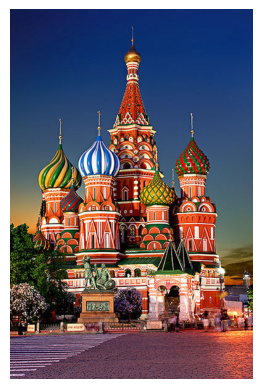

In [35]:
plt.axis('off')
plt.imshow(original_img)

Image after compression

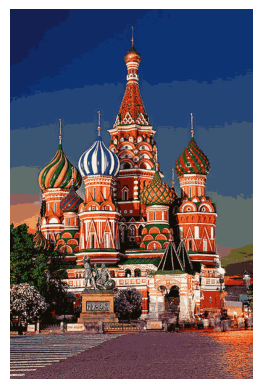

In [36]:
plt.axis('off')
plt.imshow(X_recovered)